# Naive Bayes Classification for Groovy 1.6 BETA 1 Dataset

This notebook implements Naive Bayes classification on the HCBOU-balanced Groovy dataset for software defect prediction.

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load HCBOU-Balanced Dataset

In [2]:
# Load training data (balanced and scaled)
X_train = pd.read_csv('groovy-1_6_BETA_1-hcbou-train-features-balanced-scaled.csv')
y_train = pd.read_csv('groovy-1_6_BETA_1-hcbou-train-labels-balanced.csv')['class']

# Load test data (scaled)
X_test = pd.read_csv('groovy-1_6_BETA_1-hcbou-test-features-scaled.csv')
y_test = pd.read_csv('groovy-1_6_BETA_1-hcbou-test-labels.csv')['RealBug']

print(f"Training set shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

print(f"\nTraining set class distribution:")
print(y_train.value_counts())

print(f"\nTest set class distribution:")
print(y_test.value_counts())

Training set shape: (656, 65)
Training labels shape: (656,)
Test set shape: (165, 65)
Test labels shape: (165,)

Training set class distribution:
class
False    328
True     328
Name: count, dtype: int64

Test set class distribution:
RealBug
False    151
True      14
Name: count, dtype: int64


## Naive Bayes Model Implementation

In [3]:
# Initialize Gaussian Naive Bayes with default parameters
nb_model = GaussianNB()

print("Naive Bayes Model Configuration:")
print(f"Algorithm: Gaussian Naive Bayes")
print(f"Variance smoothing: {nb_model.var_smoothing}")

Naive Bayes Model Configuration:
Algorithm: Gaussian Naive Bayes
Variance smoothing: 1e-09


## Model Training

In [4]:
# Train the Naive Bayes model
print("Training Naive Bayes model...")
nb_model.fit(X_train, y_train)
print("Training completed!")

print(f"\nModel trained on {X_train.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of classes: {len(nb_model.classes_)}")
print(f"Classes: {nb_model.classes_}")

Training Naive Bayes model...
Training completed!

Model trained on 656 samples
Number of features: 65
Number of classes: 2
Classes: [False  True]


## Model Evaluation

In [5]:
# Generate predictions
y_pred = nb_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=True)
recall = recall_score(y_test, y_pred, pos_label=True)
f1 = f1_score(y_test, y_pred, pos_label=True)

print("Naive Bayes Performance Metrics:")
print("=" * 40)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

Naive Bayes Performance Metrics:
Accuracy:  0.6242
Precision: 0.1471
Recall:    0.7143
F1-Score:  0.2439


In [6]:
# Detailed classification report
print("\nDetailed Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred))


Detailed Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.62      0.75       151
        True       0.15      0.71      0.24        14

    accuracy                           0.62       165
   macro avg       0.55      0.67      0.50       165
weighted avg       0.89      0.62      0.71       165



## Confusion Matrix

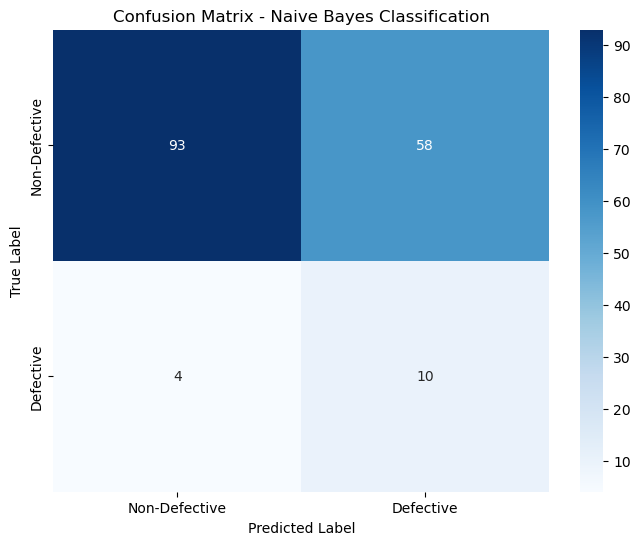


Confusion Matrix:
True Label vs Predicted Label
                 Non-Defective  Defective
Non-Defective         93           58    
Defective              4           10    


In [7]:
# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Defective', 'Defective'],
            yticklabels=['Non-Defective', 'Defective'])
plt.title('Confusion Matrix - Naive Bayes Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nConfusion Matrix:")
print("True Label vs Predicted Label")
print(f"                 Non-Defective  Defective")
print(f"Non-Defective    {cm[0,0]:^13}  {cm[0,1]:^9}")
print(f"Defective        {cm[1,0]:^13}  {cm[1,1]:^9}")

## Summary

In [8]:
# Summary of results
print("Naive Bayes Classification Summary for Groovy 1.6 BETA 1")
print("=" * 55)
print(f"Dataset: Groovy 1.6 BETA 1 (HCBOU-balanced)")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")
print(f"\nNaive Bayes Configuration:")
print(f"- Algorithm: Gaussian Naive Bayes")
print(f"- Variance smoothing: {nb_model.var_smoothing}")
print(f"- Feature independence assumption: Yes")
print(f"\nPerformance:")
print(f"- Accuracy: {accuracy:.4f}")
print(f"- Precision: {precision:.4f}")
print(f"- Recall: {recall:.4f}")
print(f"- F1-Score: {f1:.4f}")

Naive Bayes Classification Summary for Groovy 1.6 BETA 1
Dataset: Groovy 1.6 BETA 1 (HCBOU-balanced)
Training samples: 656
Test samples: 165
Features: 65

Naive Bayes Configuration:
- Algorithm: Gaussian Naive Bayes
- Variance smoothing: 1e-09
- Feature independence assumption: Yes

Performance:
- Accuracy: 0.6242
- Precision: 0.1471
- Recall: 0.7143
- F1-Score: 0.2439
